In [1]:
from astropy.io import fits
from astropy.modeling.polynomial import Chebyshev1D

import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt

7659.656001949494 0.29893433802413966 -1.103427078439e-06 -4.0027037656781e-11
7662.3191807879275 0.29932247248463023 -1.1964558928395e-06 -3.289733935034e-11


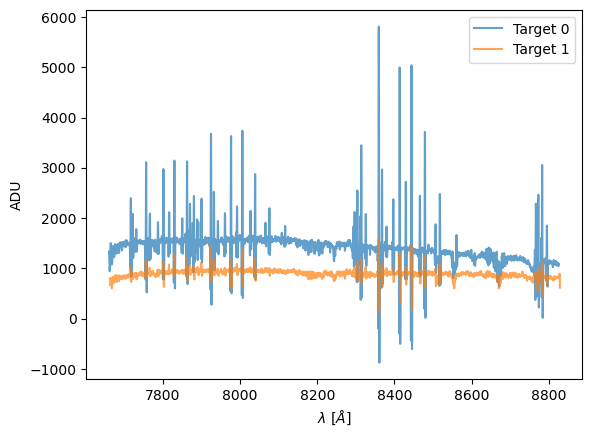

In [2]:
filenames = ['wecfsto_0329_OGLE-2024-GD-0006_SOAR_spec_1_27-06-2024_target_1_ws_2.fits',
             'wecfsto_0329_OGLE-2024-GD-0006_SOAR_spec_1_27-06-2024_target_2_ws_2.fits',
            ]

hdul = fits.open(filenames[0])

fig = plt.figure()
i = 0
spec = np.zeros(len(hdul[0].data[:]))
for f in filenames:
    hdul = fits.open(f)
    hdr = hdul[0].header 
    print(hdr['GSP_C000'], hdr['GSP_C001'], hdr['GSP_C002'], hdr['GSP_C003'])
    polynomial = Chebyshev1D(3)
    polynomial.c0 = hdr['GSP_C000']
    polynomial.c1 = hdr['GSP_C001']
    polynomial.c2 = hdr['GSP_C002']
    polynomial.c3 = hdr['GSP_C003']
    
    wavelength = polynomial(np.arange(len(hdul[0].data[:])))
    plt.plot(wavelength, hdul[0].data[:] + (i * 100), alpha=0.7, label='Target %d'%i)
    i += 1
    spec += hdul[0].data[:]

# plt.plot(wavelength, spec + (i * 100), alpha=0.7, label='Added spectra')
plt.legend(loc='best')
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel('ADU')
plt.savefig('OGLE-2024-GD-0006_spec_1.png')
plt.show()

In [3]:
data = np.vstack((wavelength, spec)).T
np.savetxt('OGLE-2024-GD-0006_spec_SOAR_spec_1.txt', data)